## Import the data and libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.sample(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
967,7764-BDPEE,Male,0,No,Yes,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.85,60.65,No
5895,8033-ATFAS,Female,0,Yes,Yes,39,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,59.85,2341.5,No
5751,0932-YIXYU,Female,0,No,No,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1029.8,No
6037,7537-CBQUZ,Male,1,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.40,7031.45,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> here i have to convert TotalCharges to int or float it has to be int or float

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().any()

False

> No null and duplicate values

In [6]:
df = df.drop(["customerID"], axis=1)

In [8]:
features = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
    if col not in features:
        print(col, df[col].unique())
        print("="*52)

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [9]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace({" " : "0.0"})

In [20]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Axes: ylabel='Churn'>

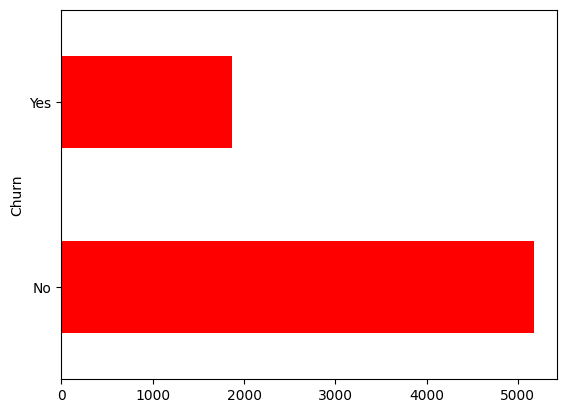

In [23]:
df["Churn"].value_counts().plot(kind="barh", color='red')

> here we can see the clear Class Imbalance

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Lets do some EDA

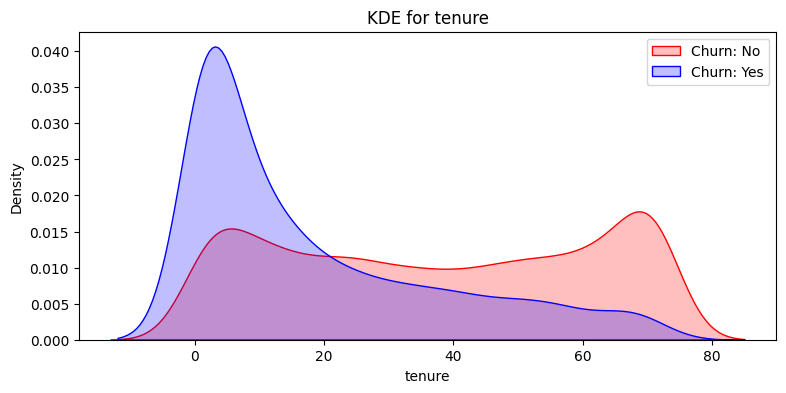

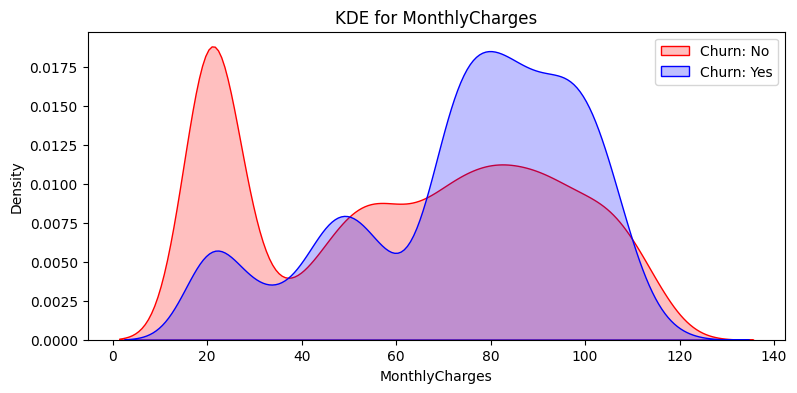

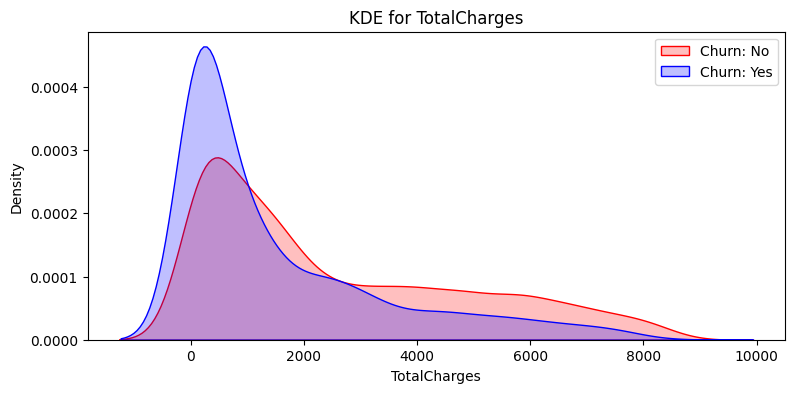

In [30]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {feature}")

    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color='red', label='Churn: No', shade=True)
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color='blue', label='Churn: Yes', shade=True)
    
    plt.legend()
    plt.show()  

kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

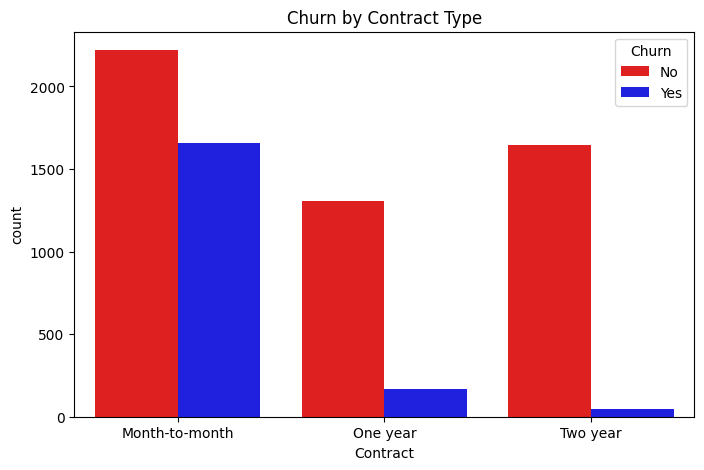

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette=['red', 'blue'])
plt.title('Churn by Contract Type')
plt.show()

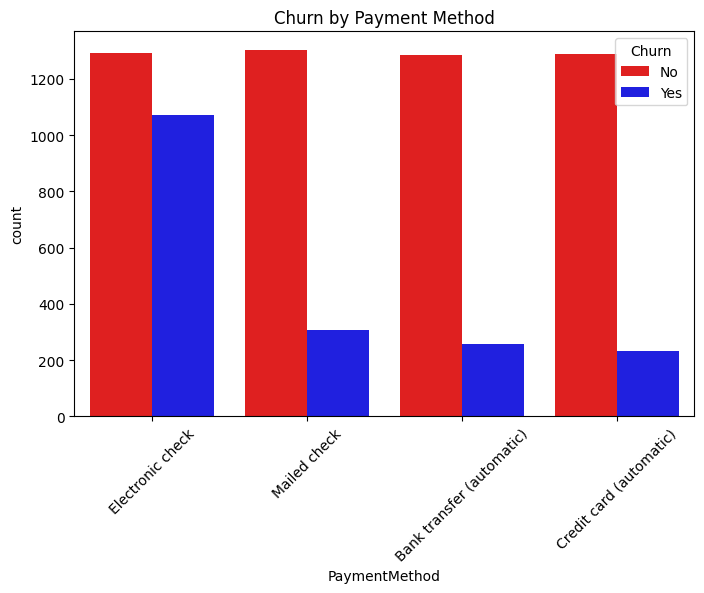

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()

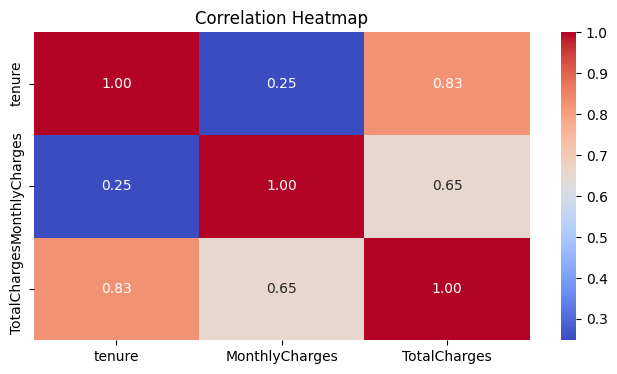

In [32]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Here i removed the irrelevent values and Convert the str values to numeric values

In [33]:
df['MultipleLines'].replace('No phone service','No',inplace=True)
df['OnlineSecurity'].replace('No internet service','No',inplace=True)
df['OnlineBackup'].replace('No internet service','No',inplace=True)
df['DeviceProtection'].replace('No internet service','No',inplace=True)
df['TechSupport'].replace('No internet service','No',inplace=True)
df['StreamingTV'].replace('No internet service','No',inplace=True)
df['StreamingMovies'].replace('No internet service','No',inplace=True)

In [34]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [35]:
df["gender"].replace({"Female" : 1, "Male" : 0}, inplace=True)

In [36]:
df2 = pd.get_dummies(data=df, columns=["InternetService", "Contract", "PaymentMethod"], dtype=int)
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5921,1,0,0,0,27,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
3325,0,0,0,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3382,0,0,1,1,72,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3566,1,0,0,1,53,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
2507,0,0,1,0,71,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Lets scale the data and Fix the Imbalanced class

In [38]:
colm_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
df2[colm_to_scale] = mmc.fit_transform(df2[colm_to_scale])

In [39]:
X = df2.drop(columns="Churn")
y = df2["Churn"]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5634, 26)
(1409, 26)
(5634,)
(1409,)


In [42]:
y_train.value_counts()

Churn
0    4118
1    1516
Name: count, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)


In [45]:
y_train_smote.value_counts()

Churn
0    4118
1    4118
Name: count, dtype: int64

# Model training and Hyperparameter tuning

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
classifier = {
    "RandomForestClassifier" : RandomForestClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "XGBClassifier"          : XGBClassifier(),
    "LogisticRegression"     : LogisticRegression(),
    "KNeighborsClassifier"   : KNeighborsClassifier()
}

In [55]:
for name, model in classifier.items():
    model.fit(X_train_smote, y_train_smote)
    print(f"\n=============={name}===============")
    y_pred = model.predict(X_test)
    report = classification_report(y_pred, y_test)
    print(report)


==============RandomForestClassifier===============
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       961
           1       0.70      0.55      0.62       448

    accuracy                           0.78      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.78      0.78      0.78      1409


==============DecisionTreeClassifier===============
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       951
           1       0.61      0.47      0.53       458

    accuracy                           0.73      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.72      0.73      0.72      1409


==============XGBClassifier===============
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       980
           1       0.67      0.55      0.60       429

    accuracy                    

In [56]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier()

# Lets Finetune the xgboost  parameters

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 500, 600], 
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],        
    "subsample": [0.6, 0.8, 1.0],      
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2],            
    "reg_lambda": [1, 5, 10],          
    "reg_alpha": [0, 1, 5]             
}

In [70]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20, 
    scoring='accuracy',
    cv=8,  
    random_state=42,
    n_jobs=-1 
)

random_search.fit(X_train_smote, y_train_smote)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.8308855095436233


In [71]:
best_xbg = random_search.best_estimator_

print("Best Params:", random_search.best_params_)
y_pred = best_xbg.predict(X_test)
print(classification_report(y_test, y_pred))

Best Params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1056
           1       0.55      0.67      0.60       353

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.80      0.78      0.79      1409



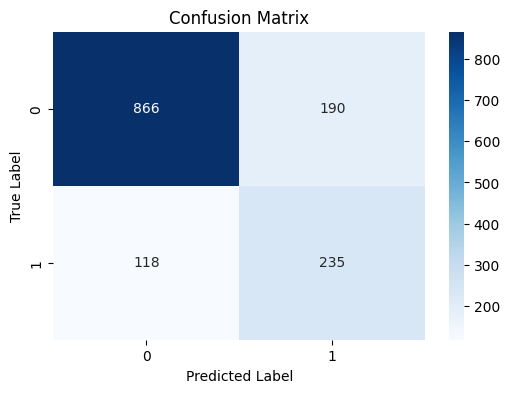

In [73]:
y_pred = best_xbg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

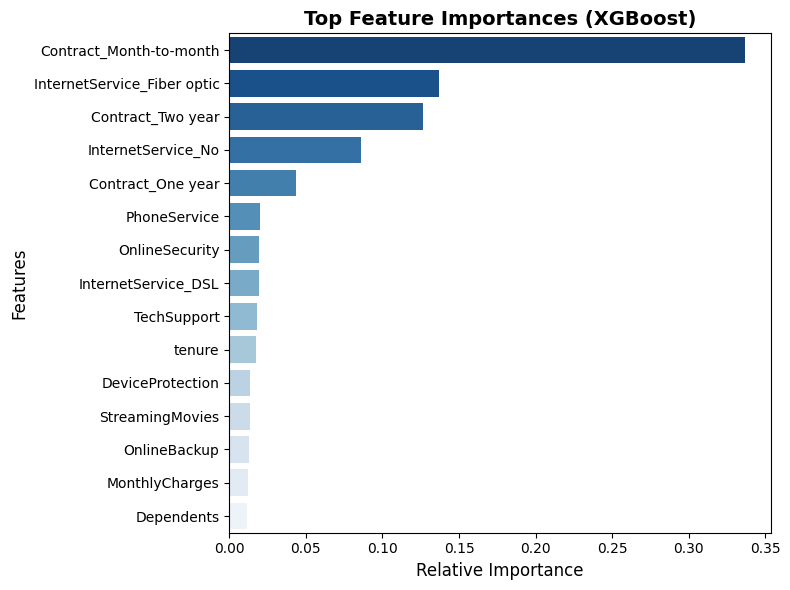

In [76]:
importances = best_xbg.feature_importances_
feature_names = X_train.columns

feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(15)  # top 15 features

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="Blues_r")
plt.title("Top Feature Importances (XGBoost)", fontsize=14, weight="bold")
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

# Conclusion

> as we can see here contract month to mont is the most inportant feature for our model

> I tired my best to improve the performence

> The accuracy i got now maybe that not enough, but for now thet's the maximum i achived 